In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [7]:
df_train=pd.read_csv("train.csv")

In [152]:
df_test=pd.read_csv("test.csv")

In [107]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_train_label=df_train['label']

In [15]:
df_train.drop('label',axis=1,inplace=True)

In [153]:
#df_train=df_train/255
df_test=df_test/255

In [154]:
#df_train=df_train.values.reshape(-1,28,28,1)
df_test=df_test.values.reshape(-1,28,28,1)

In [34]:
df_train_cat=pd.get_dummies(df_train_label)

In [192]:
X_train,X_test,y_train,y_test=train_test_split(df_train,df_train_cat.values,random_state=101,test_size=0.3)

In [201]:
X_train,X_test,y_train,y_test=train_test_split(df_train,df_train_label.values,random_state=101,test_size=0.3)

In [76]:
X_train.shape

(29400, 28, 28, 1)

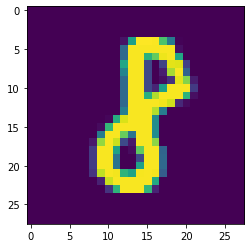

In [77]:
plt.imshow(X_train[0].reshape(28,28))

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout

In [80]:
X_train[0].shape

(28, 28, 1)

In [187]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',padding='valid'))

model.add(MaxPool2D())
model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

In [188]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)             

In [189]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [190]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [193]:
model.fit(X_train,y_train,epochs=10,callbacks=[early_stop],validation_data=[X_test,y_test])

Train on 29400 samples, validate on 12600 samples
Epoch 1/10
29400/29400 [==============================] - 14s 483us/sample - loss: 0.2763 - accuracy: 0.9148 - val_loss: 0.0752 - val_accuracy: 0.9762
Epoch 2/10
29400/29400 [==============================] - 14s 463us/sample - loss: 0.0974 - accuracy: 0.9711 - val_loss: 0.0560 - val_accuracy: 0.9837
Epoch 3/10
29400/29400 [==============================] - 14s 469us/sample - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.0704 - val_accuracy: 0.9802
Epoch 4/10
29400/29400 [==============================] - 19s 632us/sample - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.0404 - val_accuracy: 0.9881
Epoch 5/10
29400/29400 [==============================] - 20s 688us/sample - loss: 0.0426 - accuracy: 0.9856 - val_loss: 0.0491 - val_accuracy: 0.9852
Epoch 6/10
29400/29400 [==============================] - 19s 651us/sample - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0473 - val_accuracy: 0.9873


In [194]:
losses=pd.DataFrame(model.history.history)

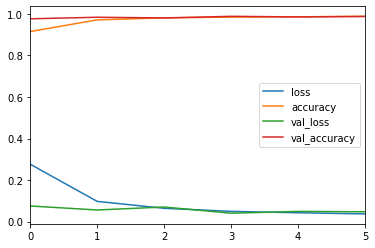

In [195]:
losses.plot()

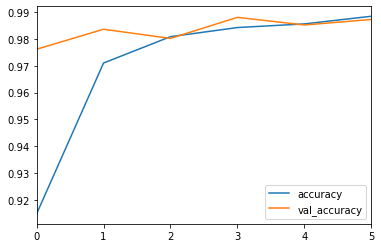

In [196]:
losses[['accuracy','val_accuracy']].plot()

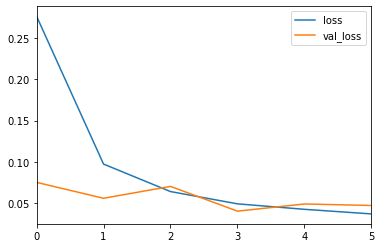

In [197]:
losses[['loss','val_loss']].plot()

In [198]:
from sklearn.metrics import classification_report,confusion_matrix

In [199]:
predictions = model.predict_classes(X_test)

In [202]:
y_test

array([1, 3, 0, ..., 9, 3, 6])

In [203]:
print(confusion_matrix(predictions,y_test))

[[1212    0    2    0    1    1    5    0    9    5]
 [   0 1407    3    1    1    1    2    0    0    0]
 [   0    6 1245    9    0    1    0    5    3    0]
 [   0    1    1 1263    0    6    0    1    0    1]
 [   0    3    1    0 1202    1    5    3    7   16]
 [   0    0    0    2    0 1107    2    1    2    2]
 [   0    1    1    0    1    2 1228    0    2    0]
 [   0    2    3    2    0    0    0 1302    1    3]
 [   1    2    2    5    0    1    0    1 1201    9]
 [   0    0    0    2    4    1    0    2    2 1273]]


In [204]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1235
           1       0.99      0.99      0.99      1415
           2       0.99      0.98      0.99      1269
           3       0.98      0.99      0.99      1273
           4       0.99      0.97      0.98      1238
           5       0.99      0.99      0.99      1116
           6       0.99      0.99      0.99      1235
           7       0.99      0.99      0.99      1313
           8       0.98      0.98      0.98      1222
           9       0.97      0.99      0.98      1284

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



In [205]:
test_predictions=model.predict_classes(df_test)

In [206]:
results = pd.Series(test_predictions,name="Label")

In [207]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [208]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [209]:
submission.to_csv('submit3.csv',index=False)